<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/chapter_12/ch12_softmax_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**파이토치를 이용한 MNIST 손글씨 분류하기**

pytorch documentation : https://pytorch.org/docs/stable/index.html

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

##**GPU 사용설정**

런타임 > 런타임 유형 변경 > GPU

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print(device)

cuda


In [3]:
# 시드 고정 => 성능
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# 하이퍼 파라미터 설정
training_epochs = 15 #학습의 횟수
batch_size = 100 #모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음

#만약 1000개의 훈련 샘플이 존재할 때, 에포크가 15이고 배치 사이즈가 100이면, 가중치를 10번 업데이트하는 것을 총 15번 반복하는 것

##**데이터 불러오기**

In [6]:
# MNIST 데이터셋
#트레인셋
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)


#테스트셋 직접 코드 짜봅시다! 
#힌트 : 훈련 여부, 텐서 형태로 변환 여부, 다운로드 여부 
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True
                         )

In [8]:
# data loader
data_loader = DataLoader(dataset=mnist_train,
                                
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

##**모델설계**
torch.nn.Linear(in_features,out_features,bias = True, device = None,dtype = None)


In [9]:
# 이미지 크기 28*28
linear = nn.Linear(28*28,10,bias=True).to(device)

In [11]:
# 비용 함수 
# 내부적으로 소프트맥스 함수를 계산하고 있음.
criterion = nn.CrossEntropyLoss().to(device)

#옵티마이저
#SGD(확률적 경사하강법)사용, 학습률 0.1
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

##**모델학습**

In [12]:
# 여기서 모르는 코드는 pytorch documentation에서 찾아보고 주석처리를 해보시는 것을 추천합니다. 
for epoch in range(training_epochs): 
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150647
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264257
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456583
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956229
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636617
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


##**모델 테스트하기**

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


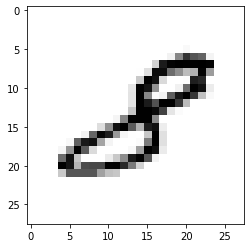

In [13]:
# 모델 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # 무작위 데이터 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()